# Laboratorio: Métodos de búsqueda

En las clases anteriores creaste códigos para realizar búsquedas aleatorias (Simulated Annealing) y búsquedas dirigidas (Optimización Bayesiana). Estos métodos de búsqueda se utilizan para facilitar el proceso de optimización de funciones objetivos compleja y costosas de computar.

En este laboratorio usaremos el dataset de los diferentes tipos de iris, y sus longitudes y anchos de pétalos y sépalos. Utilizaremos un RandomForest para crear un modelo de clasificación y el métrico F1 para decidir cuál es el mejor modelo de acuerdo a lo que tenemos disponible.

1. Carga el dataset de Iris

In [133]:
from sklearn import datasets
X, y = datasets.load_iris(return_X_y=True) #longitud de 150 cada uno 
import Bosque

2. Importa el archivo `Bosque.py`.

Este archivo contiene la función `RegresionBosque`, que recibe:
- X: las características independientes
- y: la variable de respuesta
- árboles: cantidad total de árboles
- profundidad de bosque: niveles de profundidad del bosque

Su salida es:
- modelo: El objeto con el modelo ajustado
- f1: El métrico que califica qué tan bueno es el modelo que se ajustó.


In [15]:

modelo, f1 = Bosque.RegresionBosque(X, y, 48, 2) # X, y ya te los dan 
f1 #hmmmm incluso con los mismos valores de entrada f1 es aleatorio cada vez 
#La función sólo puede recibir valores individuales enteros del 1 al infinito para árboles y profundidad 

0.9666666666666667

In [19]:
#En base a los valores de arbol y profundidad que yo meto, me regresa su respectivo valor de f1, es decir mi variable de salida, lo que quiero predecir. 


### Actividad 1:

Inicializa un espacio con 5 muestras en nuestro dominio de variables independientes:
- árboles: números enteros entre 5 y 50.
- profundidad: números enteros entre 2 y 10

Utiliza optimización Bayesiana para encontrar la combinación de árboles y profundidad que **maximice** el métrico F1.

In [ ]:
#Las variables independientes son arbol y profundidad 

In [85]:
#máximo teórico, en donde tengo el punto más alto posible. Osea el máx del intervalo de confianza y ponemos un punto ahí, pero luego volvemos a checar el intervalo 
import Bosque
import numpy as np 
import random 
import matplotlib.pyplot as plt 

arboles = np.random.randint(5,51,5) #randint no incluye el limite superior 
profundidad = np.random.randint(2,11,5)

arboles_vec = np.random.randint(5,51,5).reshape([-1,1]) #usar -1 es como decirle, que el número de filas sea el index de la ultima posición, osea una fila por cada valor 
profundidad_vec = np.random.randint(2,11,5).reshape([-1,1]) 


m1,z1 = Bosque.RegresionBosque(X, y, arboles[0], profundidad[0])
m2,z2 = Bosque.RegresionBosque(X, y, arboles[1], profundidad[1])
m3,z3 = Bosque.RegresionBosque(X, y, arboles[2], profundidad[2])
m4,z4 = Bosque.RegresionBosque(X, y, arboles[3], profundidad[3])
m5,z5 = Bosque.RegresionBosque(X, y, arboles[4], profundidad[4])

valores_z = np.array([z1, z2, z3, z4, z5]).reshape([-1,1]) #mis valores f1, de salida, lo que quiero predecir 

X_var_independientes = np.hstack((arboles_vec, profundidad_vec))

In [82]:
X_var_independientes

array([[50,  2],
       [15, 10],
       [10,  6],
       [15,  6],
       [18,  8]])

In [83]:
valores_z

array([[0.95555556],
       [0.94444444],
       [0.95555556],
       [0.95555556],
       [0.93333333]])

In [30]:
#el chiste es usar estos puntos que ya tengo para hacer una regresión Gaussiana que me pueda predecir valores de f1 (z) para otros puntos 

from sklearn.gaussian_process import GaussianProcessRegressor 
from sklearn.gaussian_process.kernels import RBF
kernel = 1.0*RBF(length_scale=1)
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer =10).fit(X_var_independientes, valores_z) 

x_arboles = np.linspace(5,50,1000).reshape([-1,1]) #linspace sí inlcuye el límite superior 
x_profundidad = np.linspace(2,10,1000).reshape([-1,1])
x_prueba = np.hstack((x_arboles ,x_profundidad))

y_pred, y_std = gp.predict(x_prueba, return_std=True) 

y_pred_low = y_pred - 1.96*y_std
y_pred_high = y_pred + 1.96*y_std


C:\Users\21ali\anaconda3\Lib\site-packages\sklearn\gaussian_process\_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\21ali\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


In [31]:
i_max = np.argmax(y_pred) 
i_max

448

In [37]:
y_pred[246] #Para comprobar en cuánto están los otros valores 

0.9555555698208646

In [35]:
y_pred[i_max]

0.9555555738913952

In [41]:
x_prueba[i_max] #....no hay decimales de árboles. No se debe usar el linspace. 

array([25.18018018,  5.58758759])

In [44]:
x_arboles = np.random.randint(5,51,1000).reshape([-1,1]) 
x_profundidad = np.random.randint(2,11,1000).reshape([-1,1])
x_prueba = np.hstack((x_arboles ,x_profundidad))

y_pred, y_std = gp.predict(x_prueba, return_std=True) 

y_pred_low = y_pred - 1.96*y_std
y_pred_high = y_pred + 1.96*y_std


In [45]:
i_max = np.argmax(y_pred) 
i_max

212

In [50]:
y_pred[557]

0.9555555722863609

In [51]:
y_pred[212], x_prueba[212]

(0.9555555774004034, array([28,  2]))

In [86]:
#Lo voy a repetir 10 veces para maximizar
#o es hacerlo 10 veces sin aumentarle a la matriz de variables independientes? 

for i in range(10): 
    kernel = 1.0*RBF(length_scale=1)
    gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer =10).fit(X_var_independientes, valores_z) 
    x_arboles = np.random.randint(5,51,1000).reshape([-1,1]) 
    x_profundidad = np.random.randint(2,11,1000).reshape([-1,1])
    x_prueba = np.hstack((x_arboles ,x_profundidad))
    y_pred, y_std = gp.predict(x_prueba, return_std=True) 
    y_pred_low = y_pred - 1.96*y_std
    y_pred_high = y_pred + 1.96*y_std
    i_max = np.argmax(y_pred) 
    X_var_independientes = np.vstack((X_var_independientes, x_prueba[i_max]))
    valores_z = np.vstack((valores_z, [[y_pred[i_max]]])) 
    
#termina el ciclo pero quiero que me haga la regresión una vez más con las últimas matrices obtenidas 
kernel = 1.0*RBF(length_scale=1)
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer =10).fit(X_var_independientes, valores_z) 
x_arboles = np.random.randint(5,51,1000).reshape([-1,1]) 
x_profundidad = np.random.randint(2,11,1000).reshape([-1,1])
x_prueba = np.hstack((x_arboles ,x_profundidad))
y_pred, y_std = gp.predict(x_prueba, return_std=True) 
y_pred_low = y_pred - 1.96*y_std
y_pred_high = y_pred + 1.96*y_std
i_max = np.argmax(y_pred) 



C:\Users\21ali\anaconda3\Lib\site-packages\sklearn\gaussian_process\_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\21ali\anaconda3\Lib\site-packages\sklearn\gaussian_process\_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\21ali\anaconda3\Lib\site-packages\sklearn\gaussian_process\_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/pre

In [87]:
y_pred[i_max], x_prueba[i_max] 

(0.9687587949170933, array([48,  2]))

La respuesta al problema de la actividad 1 después de realizar el proceso Gaussiano es que el mayor valor del metrico F1 se obtiene con la combinación de 48 árboles y 2 de profunidad. 

Sin embargo, se podría haber utilizado el linspace de manera más inteligente en lugar de usar random.randint al ponerlo como np.linspace(5,50,46). El linspace al tener la característica de escoger puntos igual de espaciados en el rango, tomaría un espacio de 1 entero entre cada número si se pusiera que se quieren exactamente la cantidad de números que hay entre los límites. En este caso 46. Esto habría evitado tener que trabajar con números enteros desde el inicio. Una implementación de esto se verá en el proyecto 3 que se entregará para la materia :) 

In [10]:
from sklearn import datasets
X, y = datasets.load_iris(return_X_y=True) #longitud de 150 cada uno 

import Bosque
sup, fra = Bosque.RegresionBosque(X, y, 48, 2) 
fra 
#esta parte del código fue para hacer la prueba de que en efecto f1 diera el resultado que encontré con los valores óptimos de árboles y profundidad 
#y me di cuenta que incluso con los mismso valores el parámero f1 es medio aleatorio...siempre cambia. 
#por lo que  creo que si hubiera utilizado el linspace para tener sólo 46 puntos por ejemplo, podría no haber llegado nunca al valor de 0.96
#en este caso creo que el usar el randint con 1000 puntos en cada iteración del ciclo de alguna manera me ayudó a llegar a ese resultado de 0.96 

0.9333333333333333

In [85]:
import Bosque
modelo, f1 = Bosque.RegresionBosque(X, y, 48, 2) 
f1
#como que es por prob y por más veces que corría la celda no lográ llegar a 0.96. Sin embargo al inicio del código se ve que tuve la suerte 
#de que con esos mismos valores de árboles y profundidad saliera 0.96... en la prueba 

0.9555555555555556

### Actividad 2:

Inicializa 2 vectores con posibles valores para las variables independientes:
- árboles: números enteros entre 5 y 50
- profundidad: números enteros entre 2 y 10

Utiliza el algoritmo de Simulated Annealing que siga el siguiente orden:
- Elige un punto de partida para las variables.
- Selecciona al azar una de las dos para modificarlas.
- Selecciona un elemento al azar de la lista que contiene los posibles valores de esa variable.
- Sigue el algoritmo ($p$ y $q$) para decidir si usas esa combinación nueva o si mantienes la anterior.

## PASO 1 

In [118]:
import numpy as np 
import random 

#punto de partida 
R1 = [24,6]

def creador_R2(R1):
    posibles_valores_arboles =np.arange(5,51) 
    posibles_valores_profundidad = np.arange(2,11)
    seleccionador = random.choice([0,1])
    if seleccionador == 0:
        valor_mod = random.choice(posibles_valores_arboles)
        R2 = [valor_mod, R1[1]] 
        return R2 
    if seleccionador == 1:
        valor_mod = random.choice(posibles_valores_profundidad)
        R2 = [R1[0], valor_mod] 
        return R2 
        
R2 = creador_R2(R1)  

R1, R2 

([24, 6], [24, 2])

In [125]:
p = random.choice([0,1])
def Distancia_R1(R1):
    modelo, f1 = Bosque.RegresionBosque(X, y, R1[0], R1[1]) 
    return f1 
def Distancia_R2(R2):
    modelo, f1 = Bosque.RegresionBosque(X, y, R1[0], R1[1]) 
    return f1 

D_R1 = Distancia_R1(R1) 
D_R2 = Distancia_R2(R2) 
#T = 100
q = np.exp((D_R1 - D_R2)/(100))  
if p < q:
    R1 = R2 
R1 

[24, 2]

## PASO 2 

In [124]:
def paso2(R1, N):
    for i in range(N):
        R2 = creador_R2(R1)  
        p = random.choice([0,1])
        D_R1 = Distancia_R1(R1) 
        D_R2 = Distancia_R2(R2) 
        #T = 100
        q = np.exp((D_R1 - D_R2)/(100))  
        if p < q:
            R1 = R2 
    return R1 

paso2(R1,10) #tarda como 2 min 

[21, 5]

## PASO 3 

In [138]:
def paso3(T,N):
    R1 = [24,6]
    while T > 1:
        R_mejor = paso2(R1,N)
        R1 = R_mejor.copy() 
        T = T*0.90 
    return R1 

paso3(2,1) #lo tuve que probar con valores pequeños pq con 100 y 10 tarda más de media hora :( 

[45, 3]

## PASO 4 

In [152]:
def paso4(T,M,N):
    variables_independientes = [] 
    metrico_f1 = [] 
    m = 0
    while m < M:
        R1 = paso3(T,N) 
        parametro = Distancia_R1(R1)
        variables_independientes.append(R1)
        metrico_f1.append(parametro)
        m += 1 
    return variables_independientes, metrico_f1 

variables_independientes, metrico_f1 = paso4(1,4,4)

In [153]:
indice = (np.array(metrico_f1 )).argmax()
len(variables_independientes), indice

(4, 0)

In [154]:
variables_independientes[indice], metrico_f1[indice] 

([24, 6], 0.9555555555555556)

## PASO 5 

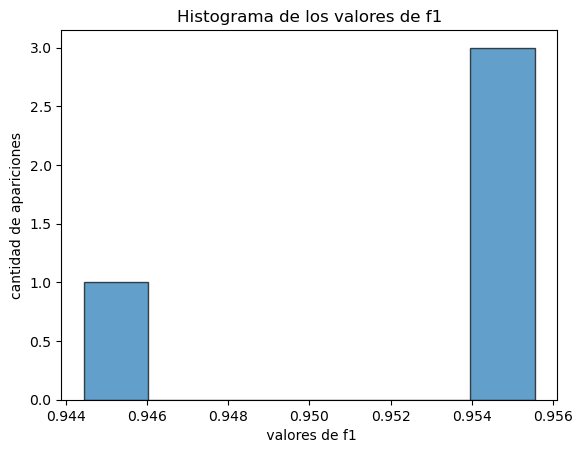

In [155]:
 import matplotlib.pyplot as plt

plt.hist(metrico_f1, bins=7, edgecolor='black', alpha=0.7)

plt.xlabel(' valores de f1')
plt.ylabel('cantidad de apariciones')
plt.title('Histograma de los valores de f1')

plt.show()

El hisograma sale con muy poquita variedad porque por el tiempo requerido para correr el código tardaba demasiado en sacar más valores...creo que no es un método muy eficiente jajaja 